In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
# Load the .wav file
file = wave.open('Subjek 19 - Abnormal.wav', 'r')

In [58]:
# Get the sampling frequency and the number of frames
fs = file.getframerate()
num_frames = file.getnframes()

print("frekuensi sampling :",fs)
print("banyaknya sample :",num_frames)

frekuensi sampling : 8000
banyaknya sample : 79538


In [59]:
# Calculate the duration of the audio signal
duration = num_frames / fs
print("lama durasi :", duration)

lama durasi : 9.94225


In [60]:
# Create a time array
time = np.linspace(0, duration, num_frames)

In [61]:
# Read the frames as bytes
frames = file.readframes(num_frames)
# Convert the bytes to integers
amplitude = np.frombuffer(frames, dtype='int16')
amplitude_left = amplitude[0::2]
amplitude_right = amplitude[1::2]

In [62]:
# Print the first 16 bytes as integers
#print(list(frames))

In [63]:
# Calculate the mean and perform DC bias removal
mean = np.mean(amplitude_right)
amplitude_right = amplitude_right - mean

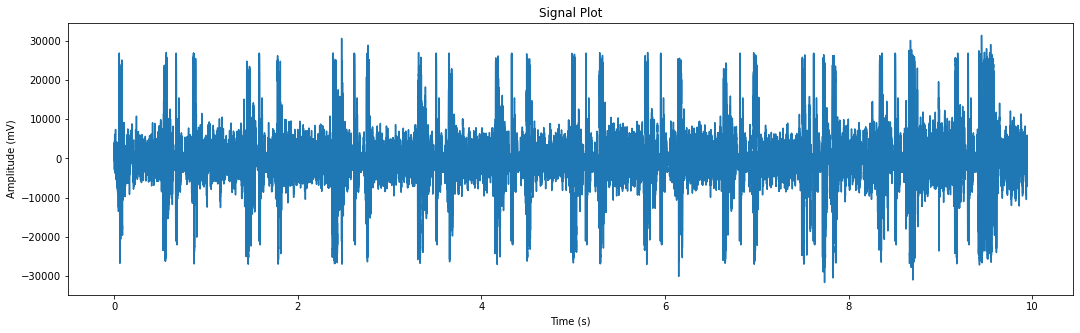

In [64]:
# Plot the signal
plt.figure(figsize=(18,5))
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Plot')
plt.show()

In [65]:
#Daubechies Wavelet
#lpf
h = [0]*4
h[0] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))
h[1] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
h[2] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
h[3] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))

#hpf
g = [0]*4

for i in range(4):
    g[i] = math.pow(-1, i) * h[3-i]
    

print("nilai h0 = ", round(h[0], 2))
print("nilai h1 = ", round(h[1], 2))
print("nilai h2 = ", round(h[2], 2))
print("nilai h3 = ", round(h[3], 2))
print("---")

print("nilai g0 = ", round(g[0], 2))
print("nilai g1 = ", round(g[1], 2))
print("nilai g2 = ", round(g[2], 2))
print("nilai g3 = ", round(g[3], 2))

nilai h0 =  0.48
nilai h1 =  0.84
nilai h2 =  0.22
nilai h3 =  -0.13
---
nilai g0 =  -0.13
nilai g1 =  -0.22
nilai g2 =  0.84
nilai g3 =  -0.48


In [66]:
ndat = len(amplitude_right)
ndat

79538

In [67]:
def dekomposisi(div, sinyal):
    a = [0.0] * (ndat // div)
    d = [0.0] * (ndat // div)
    
    for i in range(1, ndat//div):
        a[i] = 0.0
        d[i] = 0.0
        for j in range(4):
            if 2*i+j < len(sinyal):
                a[i] += h[j] * sinyal[2*i+j] #h[1] * sinyal[2*i-1] + h[2] * sinyal[2*i-2]
                d[i] += g[j] * sinyal[2*i+j]
                
    return a, d

In [68]:
def plotA(level, div, a):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time[:ndat//div-1], a[1:])
    plt.title(f'Approximation Coefficients Level {level}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()

In [69]:
def plotD(level, div, d):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time[:ndat//div-1], d[1:])
    plt.title(f'Detail Coefficients Level {level}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()

In [70]:
#dekomposisi 1
a1, d1 = dekomposisi(2, amplitude_right)
#plotA(1, 2, a1)
#plotD(1, 2, d1)

In [71]:
#dekomposisi 2
a2, d2 = dekomposisi(4, a1)
#plotA(2, 4, a2)
#plotD(2, 4, d2)

In [72]:
#dekomposisi 3
a3, d3 = dekomposisi(8, a2)
#plotA(3, 8, a3)
#plotD(3, 8, d3)

In [73]:
#dekomposisi 4
a4, d4 = dekomposisi(16, a3)
#plotA(4, 16, a4)
#plotD(4, 16, d4)

In [74]:
#dekomposisi 5
a5, d5 = dekomposisi(32, a4)
#plotA(5, 32, a5)
#plotD(5, 32, d5)

In [75]:
#dekomposisi 6
a6, d6 = dekomposisi(64, a5)
#plotA(6, 64, a6)
#plotD(6, 64, d6)

In [76]:
# Plot the signal
#plt.figure(figsize=(18, 5))
#plt.subplot(211)
#plt.plot(time, amplitude_right)
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.title('Signal Asli')
#plt.show()

#dekomposisi 7
a7, d7 = dekomposisi(128, a6)
#plotA(7, 128, a7)
#plotD(7, 128, d7)

In [77]:
#dekomposisi 8
a8, d8 = dekomposisi(256, a7)
#plotA(8, 256, a8)
#plotD(8, 256, d8)

In [78]:
#dekomposisi 9
a9, d9 = dekomposisi(512, a8)
#plotA(9, 512, a9)
#plotD(9, 512, d9)

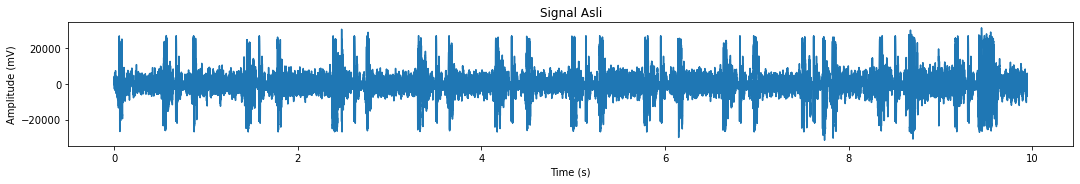

Koefisien Aproksimasi


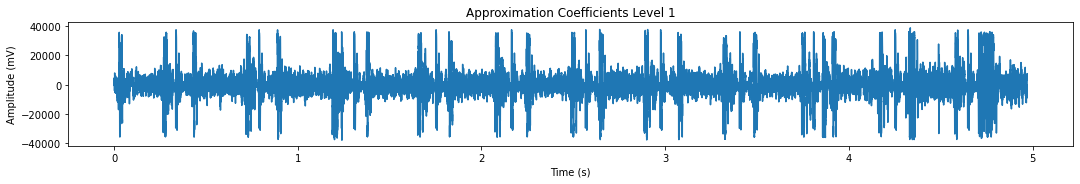

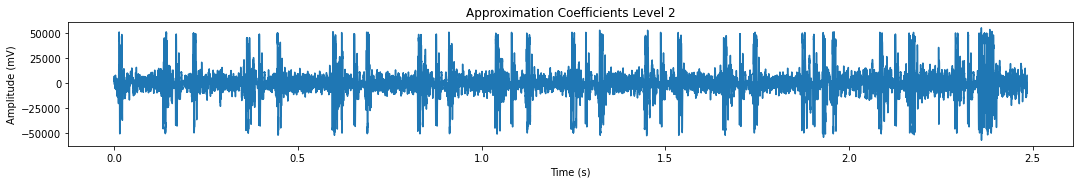

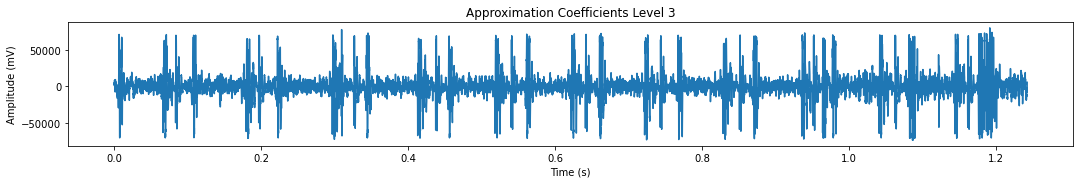

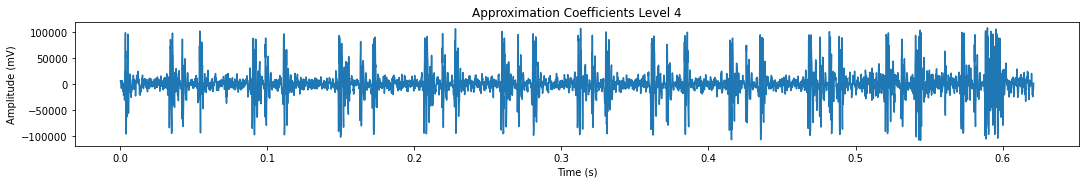

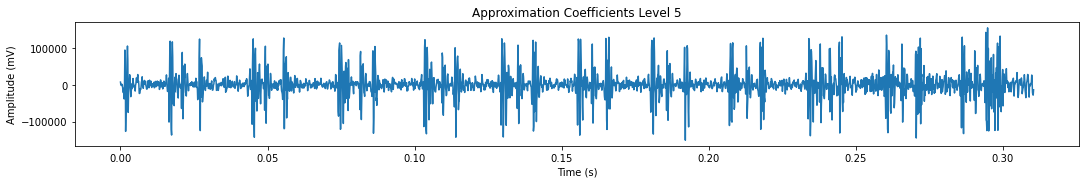

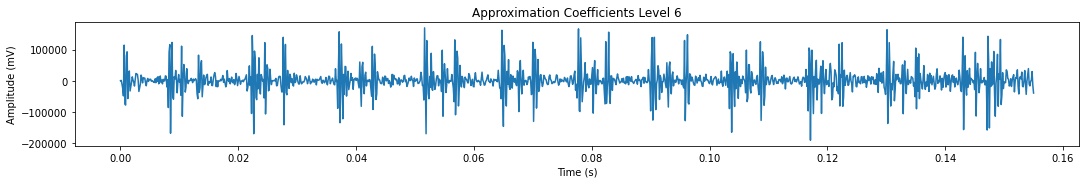

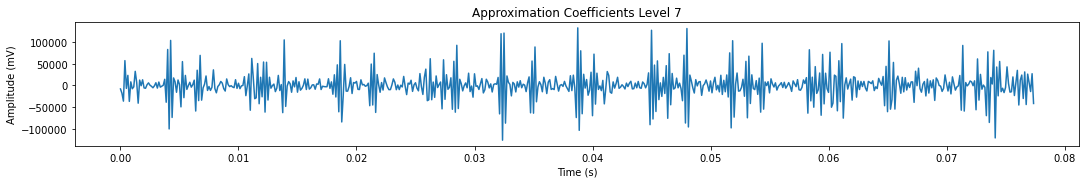

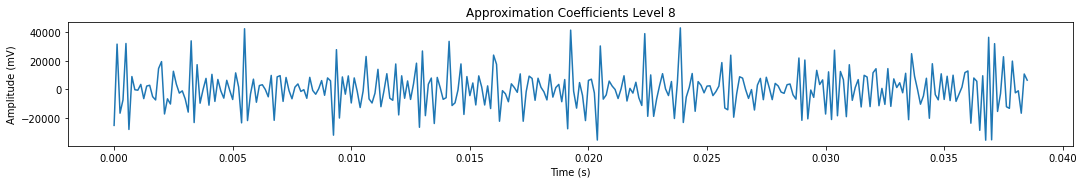

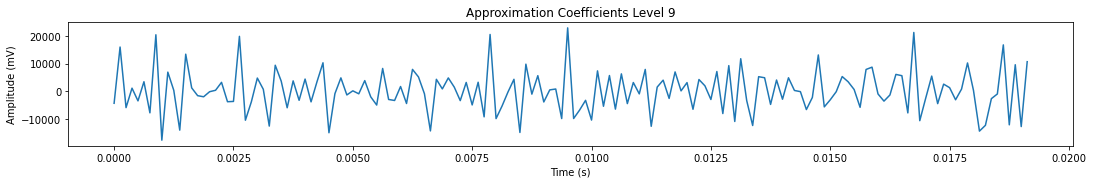

In [79]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Koefisien Aproksimasi")
plotA(1, 2, a1)
plotA(2, 4, a2)
plotA(3, 8, a3)
plotA(4, 16, a4)
plotA(5, 32, a5)
plotA(6, 64, a6)
plotA(7, 128, a7)
plotA(8, 256, a8)
plotA(9, 512, a9)

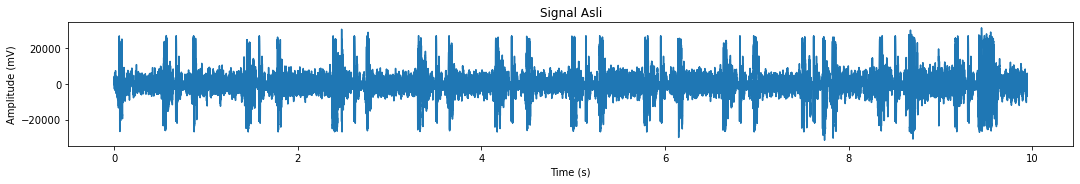

Koefisien Detail


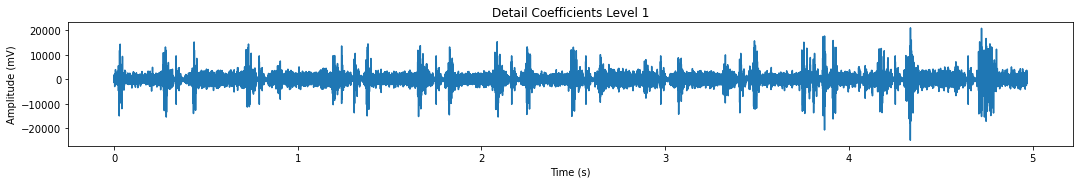

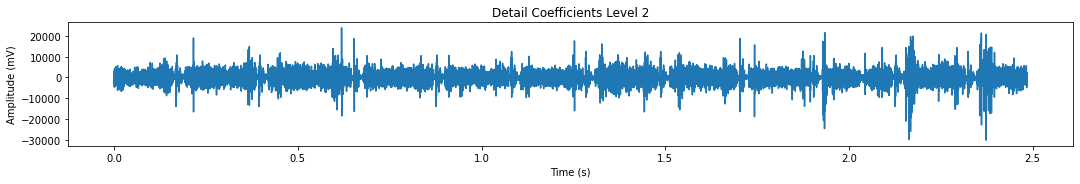

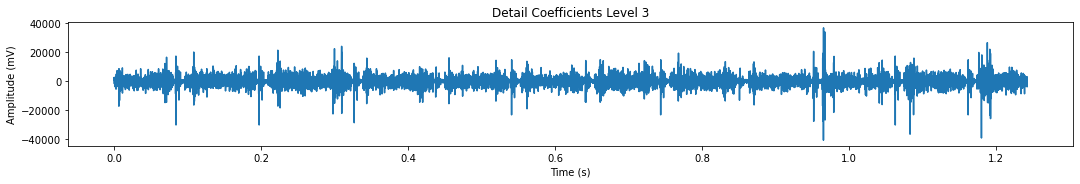

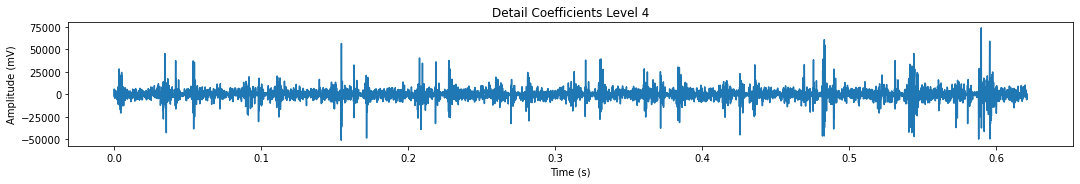

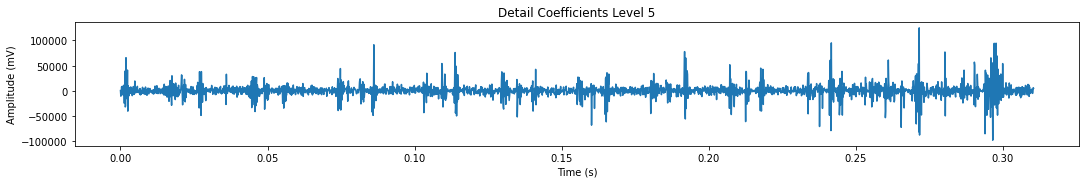

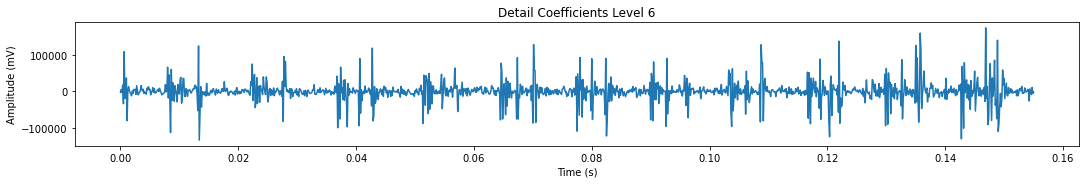

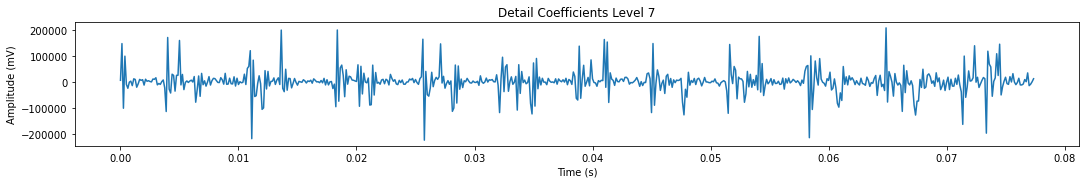

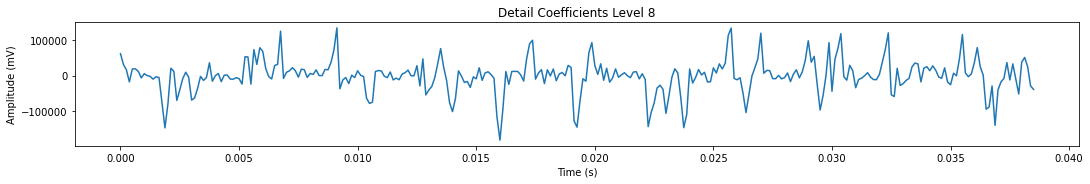

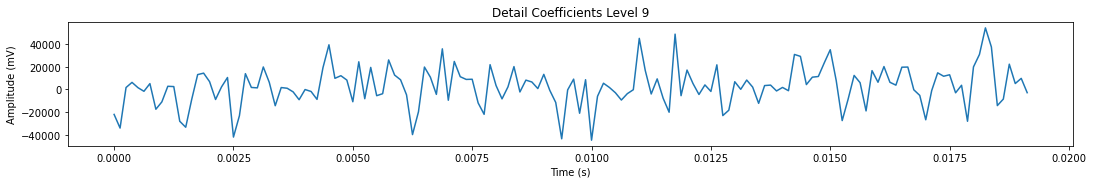

In [80]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Koefisien Detail")
plotD(1, 2, d1)
plotD(2, 4, d2)
plotD(3, 8, d3)
plotD(4, 16, d4)
plotD(5, 32, d5)
plotD(6, 64, d6)
plotD(7, 128, d7)
plotD(8, 256, d8)
plotD(9, 512, d9)

In [81]:
#coef rekon
ih = [0]*4
ih[0] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[1] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[2] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
ih[3] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))

ig = [0]*4

for i in range(4):
    ig[i] = math.pow(-1, i) * ih[3-i]

In [82]:
def rekonstruksi(a, d):
    sinyal = [0.0] * len(a) * 2
    
    for i in range(len(a)):
        for j in range(4):
            if 2*i+j < len(sinyal):
                sinyal[2*i+j] += ih[j] * a[i] + ig[j] * d[i]
            #print(f"Sinyal saat i={i}: {sinyal}")
                
    return sinyal

In [83]:
def plotRekon(sinyal, level):
    time_rekon = np.arange(len(sinyal)) / fs
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time_rekon, sinyal)
    plt.title(f'Sinyal Rekonstruksi Level {level}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()

In [84]:
a1_rekonstruksi = rekonstruksi(a1, d1)
a2_rekonstruksi = rekonstruksi(a2, d2)
a3_rekonstruksi = rekonstruksi(a3, d3)
a4_rekonstruksi = rekonstruksi(a4, d4)
a5_rekonstruksi = rekonstruksi(a5, d5)
a6_rekonstruksi = rekonstruksi(a6, d6)
a7_rekonstruksi = rekonstruksi(a7, d7)
a8_rekonstruksi = rekonstruksi(a8, d8)
a9_rekonstruksi = rekonstruksi(a9, d9)


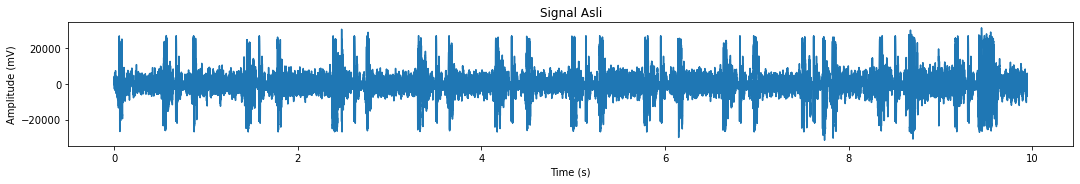

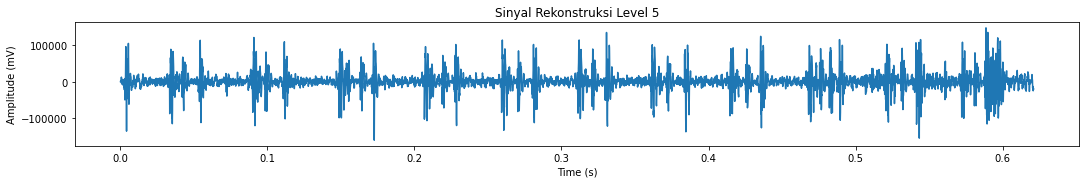

In [85]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

plotRekon(a5_rekonstruksi, 5)

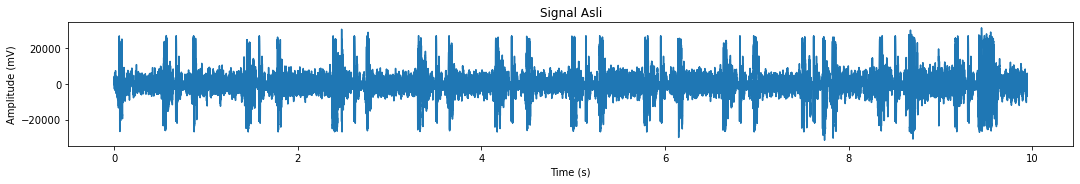

Sinyal Rekonstruksi


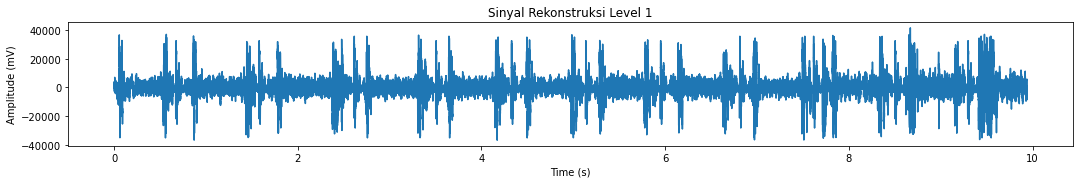

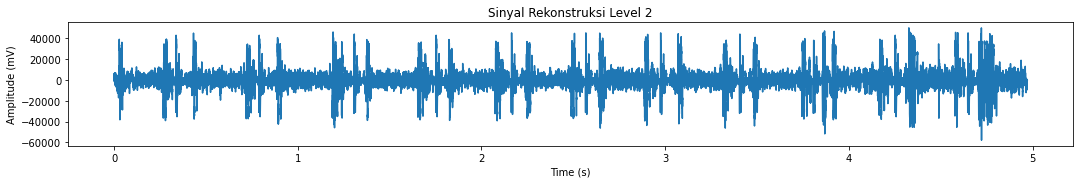

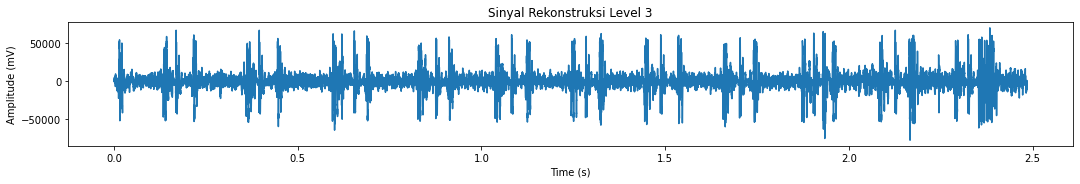

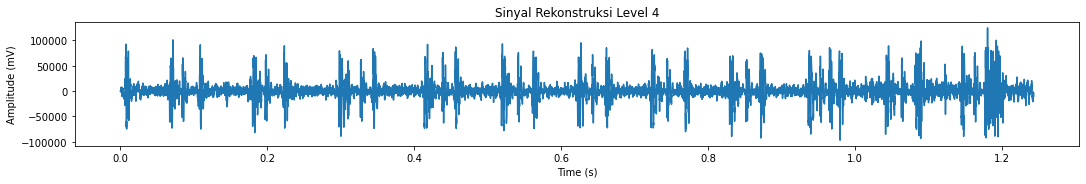

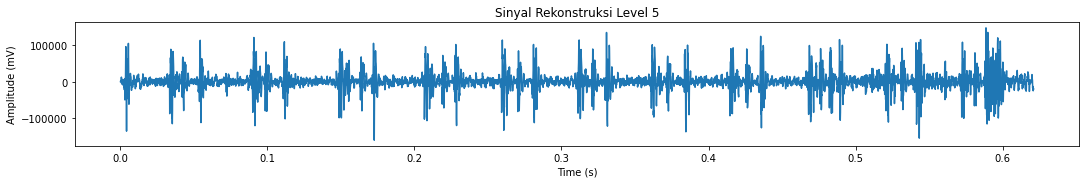

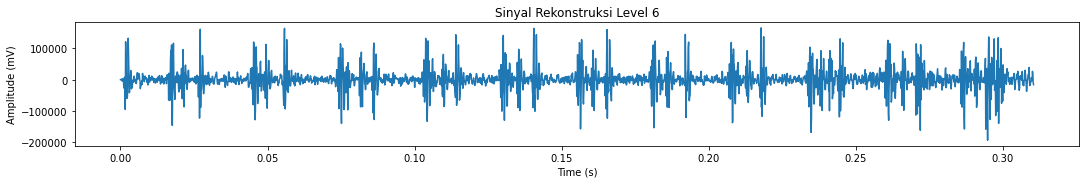

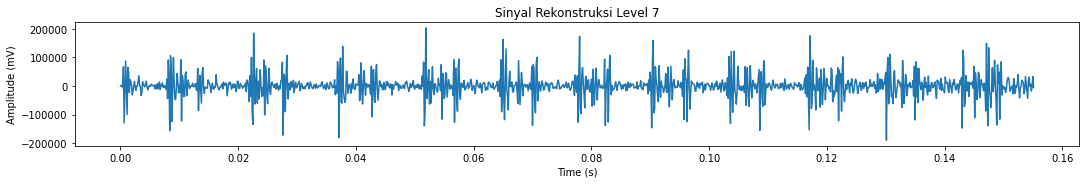

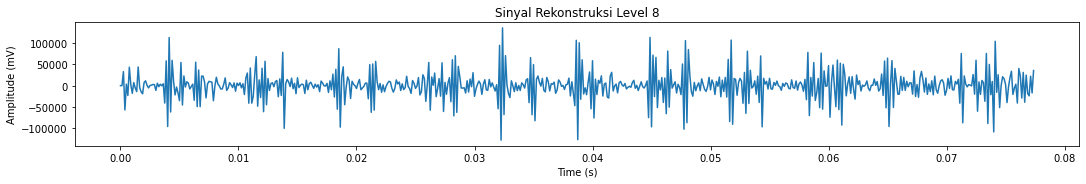

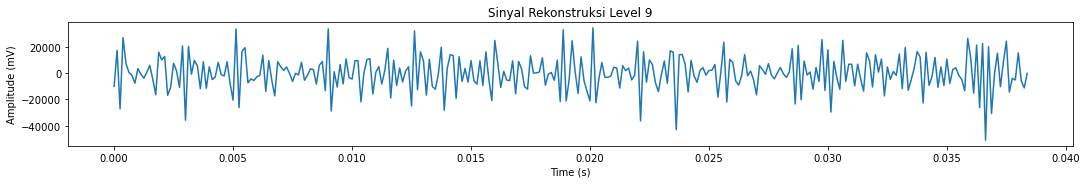

In [86]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Sinyal Rekonstruksi")
plotRekon(a1_rekonstruksi, 1)
plotRekon(a2_rekonstruksi, 2)
plotRekon(a3_rekonstruksi, 3)
plotRekon(a4_rekonstruksi, 4)
plotRekon(a5_rekonstruksi, 5)
plotRekon(a6_rekonstruksi, 6)
plotRekon(a7_rekonstruksi, 7)
plotRekon(a8_rekonstruksi, 8)
plotRekon(a9_rekonstruksi[2:], 9)

#print(a9_rekonstruksi)

In [87]:
def abs(sinyal):
    return np.abs(sinyal)

d5_abs = abs(d5)
a5_abs = abs(a5)
rekon5_abs = abs(a5_rekonstruksi)
rekon1_abs = abs(a1_rekonstruksi)

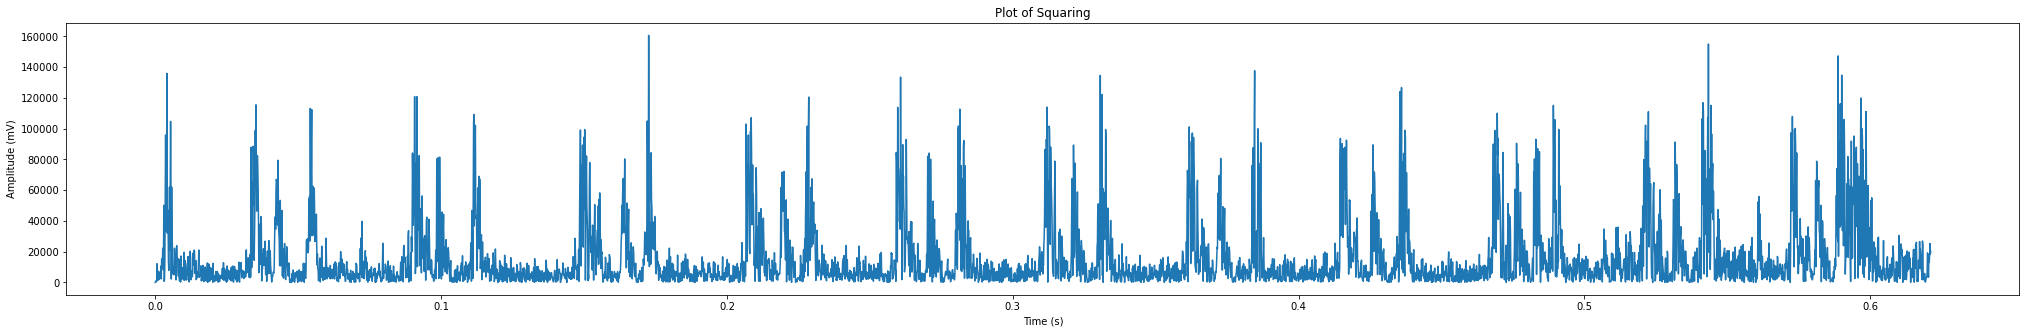

In [88]:
# Plotting untuk mav_a5
time_abs = np.arange(len(rekon5_abs)) / fs

plt.figure(figsize=(35, 5))
plt.plot(time_abs, rekon5_abs)
plt.title("Plot of Squaring")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.show()

In [89]:
#MAV
def MAV(sinyal, orde):
    n = len(sinyal)
    mav = [0] * n
    mav2 = [0] * n
    for k in range(n):
        mav1 = 0
        for m in range(orde):
            y1 = k - m
            if y1 < 0:
                mav1 += sinyal[0]
            else:
                # forward
                mav1 += sinyal[k - m]
        mav2[k] = mav1 / orde
        # backward
        mav3 = 0
        for m in range(orde):
            if k + m < n:
                mav3 += mav2[k + m]
        mav[k] = mav3 / orde
    return mav

In [90]:
mav_d5=MAV(d5_abs, 2)
mav_a5=MAV(a5_abs, 2)
mav_rekon5=MAV(rekon5_abs, 60)
mav_rekon1=MAV(rekon1_abs, 35)

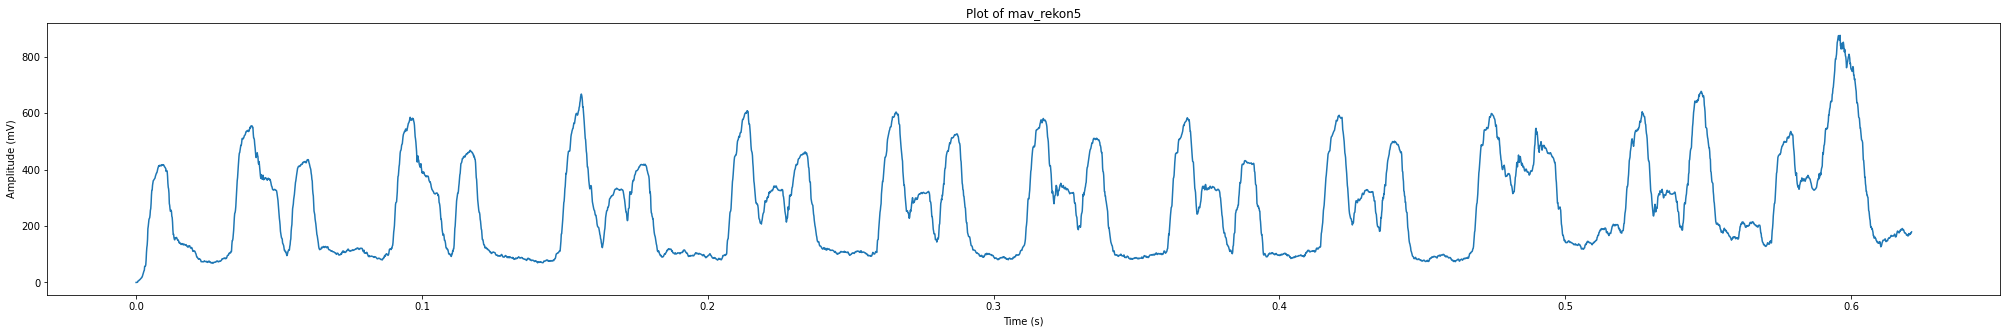

In [91]:
# Plotting untuk mav_a5
time_mav = np.arange(len(mav_rekon5)) / fs

plt.figure(figsize=(35, 5))
plt.plot(time_mav, mav_rekon5)
plt.title("Plot of mav_rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()
#print(mav_rekon5)

In [92]:
def max(sinyal):
    S = 0
    for i in range(len(sinyal)):
        if S < sinyal[i]:
            S = sinyal[i]

    return S

def normalize_mav(mav):
    max_mav = max(mav)
    normmav = [0] * len(mav)
    for i in range(len(mav)):
        normmav[i] = mav[i] / max_mav
    return normmav

In [93]:
normalize_mavd5 = normalize_mav(mav_d5)
normalize_mava5 = normalize_mav(mav_a5)
normalize_rekon5 = normalize_mav(mav_rekon5)
normalize_rekon1 = normalize_mav(mav_rekon1)

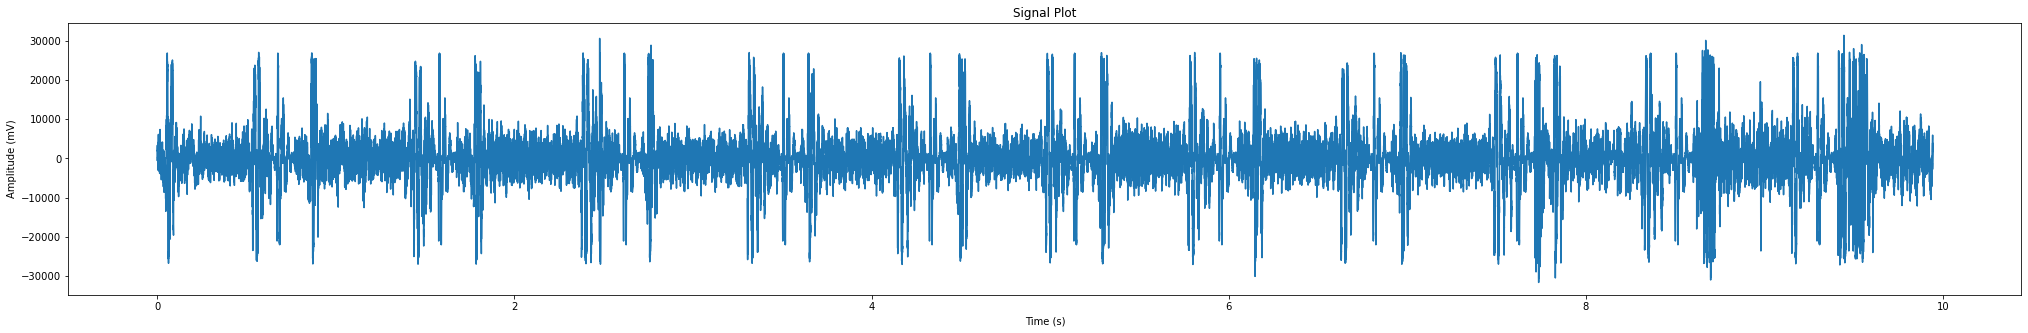

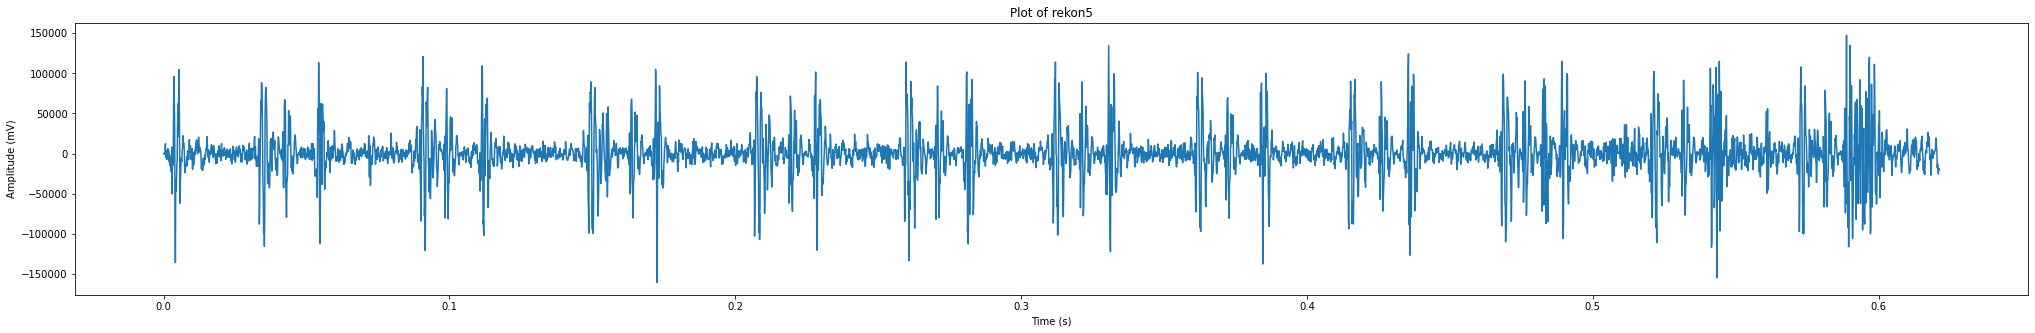

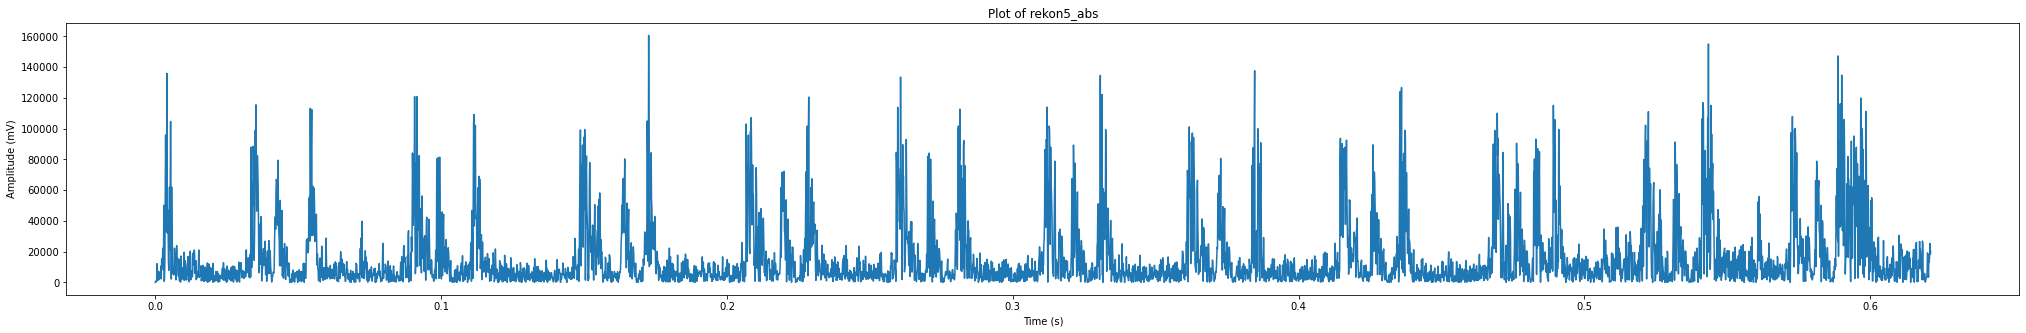

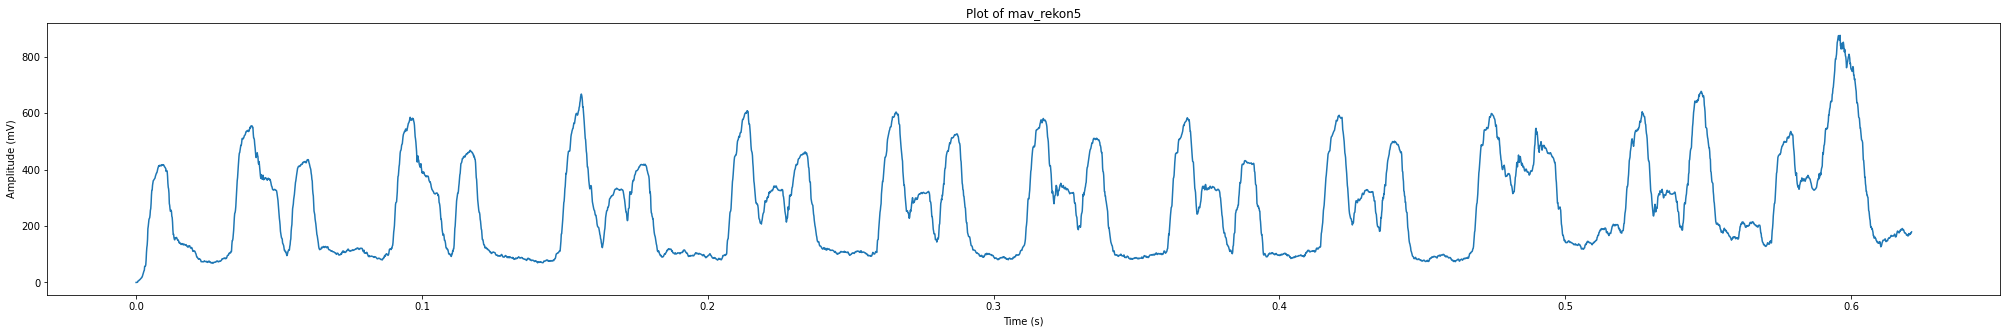

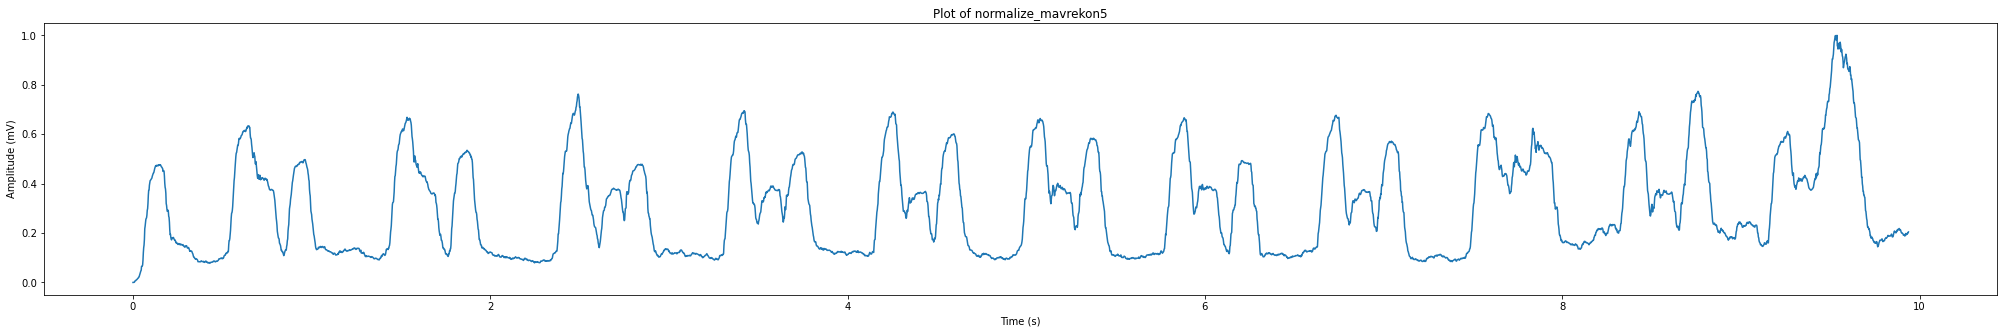

In [94]:
# Plot the signal
plt.figure(figsize=(35, 5))
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Plot')
plt.show()

time_rekon = np.arange(len(a5_rekonstruksi)) / fs
# Plotting untuk a5
plt.figure(figsize=(35, 5))
plt.plot(time_rekon, a5_rekonstruksi)
plt.title("Plot of rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

time_abs = np.arange(len(rekon5_abs)) / fs
# Plotting untuk a5_abs
plt.figure(figsize=(35, 5))
plt.plot(time_abs,rekon5_abs)
plt.title("Plot of rekon5_abs")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

# Plotting untuk mav_a5
plt.figure(figsize=(35, 5))
plt.plot(time_mav, mav_rekon5)
plt.title("Plot of mav_rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


time_normalize = np.arange(len(normalize_rekon5)) / fs

# Plotting untuk normalize_mava5
plt.figure(figsize=(35, 5))
plt.plot(time_normalize*16,normalize_rekon5)
plt.title("Plot of normalize_mavrekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


In [95]:
def thresholdcoba(mav, thres):
    max_value = np.max(mav)
    res = []
    dt = len(mav)/8000
    for i in mav:
        if i > thres * max_value:
            res.append(1)
            print(len(res)*16/8000)  # cetak nilai sumbu x saat append(1)
        else:
            res.append(0)
    return res

In [96]:
threshold_rekon5coba=thresholdcoba(normalize_rekon5, 0.4)

0.096
0.098
0.1
0.102
0.104
0.106
0.108
0.11
0.112
0.114
0.116
0.118
0.12
0.122
0.124
0.126
0.128
0.13
0.132
0.134
0.136
0.138
0.14
0.142
0.144
0.146
0.148
0.15
0.152
0.154
0.156
0.158
0.16
0.162
0.164
0.166
0.168
0.17
0.172
0.174
0.176
0.178
0.18
0.568
0.57
0.572
0.574
0.576
0.578
0.58
0.582
0.584
0.586
0.588
0.59
0.592
0.594
0.596
0.598
0.6
0.602
0.604
0.606
0.608
0.61
0.612
0.614
0.616
0.618
0.62
0.622
0.624
0.626
0.628
0.63
0.632
0.634
0.636
0.638
0.64
0.642
0.644
0.646
0.648
0.65
0.652
0.654
0.656
0.658
0.66
0.662
0.664
0.666
0.668
0.67
0.672
0.674
0.676
0.678
0.68
0.682
0.684
0.686
0.688
0.69
0.692
0.694
0.696
0.698
0.7
0.702
0.704
0.706
0.708
0.71
0.712
0.714
0.716
0.718
0.72
0.722
0.724
0.726
0.728
0.73
0.732
0.734
0.736
0.738
0.74
0.742
0.744
0.746
0.748
0.75
0.752
0.754
0.756
0.894
0.896
0.898
0.9
0.902
0.904
0.906
0.908
0.91
0.912
0.914
0.916
0.918
0.92
0.922
0.924
0.926
0.928
0.93
0.932
0.934
0.936
0.938
0.94
0.942
0.944
0.946
0.948
0.95
0.952
0.954
0.956
0.958
0.96
0.962
0

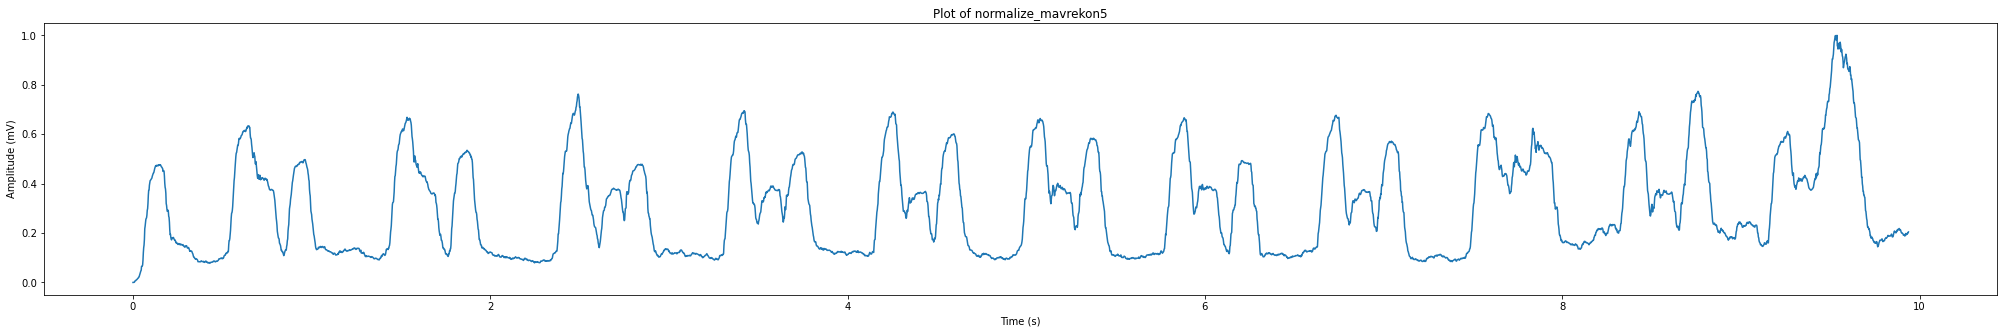

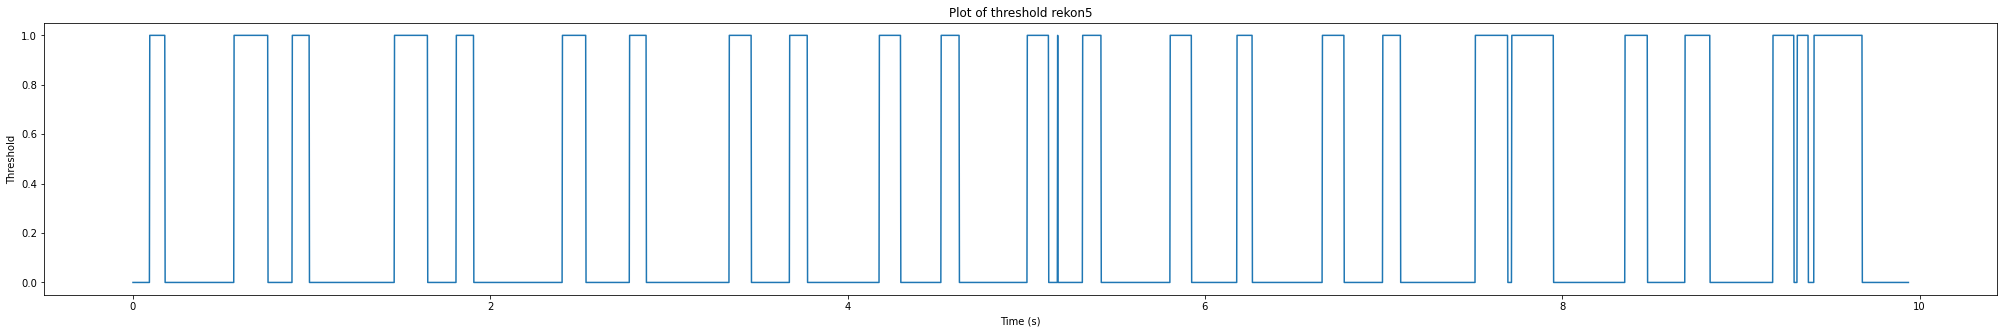

In [97]:
time_normalize = np.arange(len(normalize_rekon5)) / fs *16

# Plotting untuk normalize_mava5
plt.figure(figsize=(35, 5))
plt.plot(time_normalize,normalize_rekon5)
plt.title("Plot of normalize_mavrekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


time_threshold = np.arange(len(threshold_rekon5coba)) / fs *16

# Plotting untuk threshold_rekon5
plt.figure(figsize=(35, 5))
plt.plot(time_threshold, threshold_rekon5coba)
plt.title("Plot of threshold rekon5")
plt.xlabel('Time (s)')
plt.ylabel("Threshold")
plt.show()

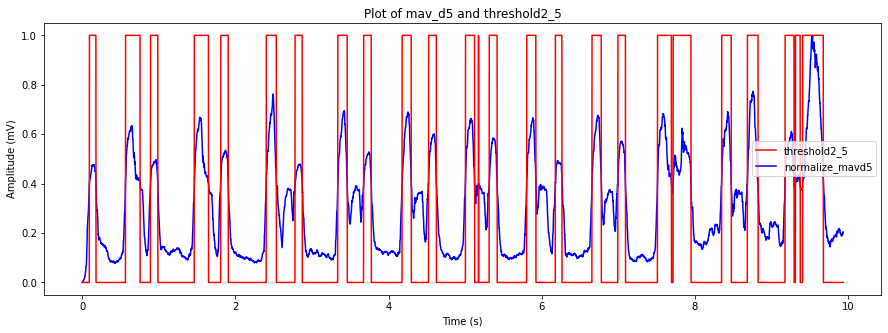

In [98]:



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold, threshold_rekon5coba, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize, normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()

In [99]:
def thresholdcoba3(mav, thres):
    max_value = np.max(mav)
    res = []
    x_start = []
    x_end = []
    middle_points = []  # New list to store the middle points
    selisih_values = []
    for i in range(len(mav)):
        if i == 0 and mav[i] > thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif i == len(mav) - 1 and mav[i] > thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
        elif mav[i] > thres * max_value and mav[i - 1] <= thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif mav[i] > thres * max_value and mav[i + 1] <= thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end

    for start, end in zip(x_start, x_end):
        print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16)
        #print("x start:", start / 8000 * 16) 
        selisih = (end-start) / 8000 * 16
        middle_point = ((start + end) / 2) / 8000 * 16
        middle_points.append(middle_point)
        selisih_values.append(selisih)
        print("Middle point:", middle_point)
        print("Selisih:", selisih)
        #print("")
        
    #for start, end in zip(x_start, x_end):
        #print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16)
        #print("x end:", end / 8000 * 16) 

    for i in mav:
        res.append(1) if i > thres * max_value else res.append(0)
    return res, middle_points, selisih_values

In [100]:
threshold_rekon5coba3 = thresholdcoba3(normalize_rekon5, 0.4)
res, middle_points, selisih_values = threshold_rekon5coba3

x start: 0.096 x end: 0.18
Middle point: 0.138
Selisih: 0.084
x start: 0.568 x end: 0.756
Middle point: 0.662
Selisih: 0.188
x start: 0.894 x end: 0.988
Middle point: 0.941
Selisih: 0.094
x start: 1.466 x end: 1.65
Middle point: 1.558
Selisih: 0.184
x start: 1.812 x end: 1.908
Middle point: 1.86
Selisih: 0.096
x start: 2.406 x end: 2.536
Middle point: 2.471
Selisih: 0.13
x start: 2.782 x end: 2.874
Middle point: 2.828
Selisih: 0.092
x start: 3.34 x end: 3.462
Middle point: 3.401
Selisih: 0.122
x start: 3.678 x end: 3.776
Middle point: 3.727
Selisih: 0.098
x start: 4.18 x end: 4.298
Middle point: 4.239
Selisih: 0.118
x start: 4.526 x end: 4.626
Middle point: 4.576
Selisih: 0.1
x start: 5.008 x end: 5.126
Middle point: 5.067
Selisih: 0.118
x start: 5.178 x end: 5.42
Middle point: 5.299
Selisih: 0.242
x start: 5.318 x end: 5.926
Middle point: 5.622
Selisih: 0.608
x start: 5.808 x end: 6.266
Middle point: 6.037
Selisih: 0.458
x start: 6.182 x end: 6.78
Middle point: 6.481
Selisih: 0.598
x 

In [101]:
def thresholdcoba33(mav, thres):
    max_value = np.max(mav)
    res = []
    x_start = []
    x_end = []
    selisih_values = []  
    middle_points = []  # Define middle_points as an empty list inside the function
    for i in range(len(mav)):
        if i == 0 and mav[i] > thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif i == len(mav) - 1 and mav[i] > thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
        elif mav[i] > thres * max_value and mav[i - 1] <= thres * max_value and mav[i + 1] >= thres:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif mav[i] > thres * max_value and mav[i + 1] <= thres * max_value and mav[i - 1] >= thres:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
                
    for i in range(len(x_start)):
        start = x_start[min(i, len(x_start) - 1)]
        end = x_end[min(i, len(x_end) - 1)]
        x_start_middle = ((start + end) / 2) / 8000 * 16
        selisih = (end-start)/ 8000 * 16
        selisih_values.append(selisih)

        
        skip_iteration = False  # Flag to skip appending x_start_middle
        if i < len(x_start) - 1:
            prev_start = x_start[i - 1]
            prev_end = x_end[i -  1]
            prev_x_start_middle = ((prev_start + prev_end) / 2) / 8000 * 16
            difference = x_start_middle - prev_x_start_middle
            print("")
            print("dif :", difference)
            if i > 0:
                if difference < 0.150 and selisih < 0.02 :
                    skip_iteration = True
                if difference > 0.150 and selisih < 0.02 :
                    skip_iteration = True
                    
        print(start/8000*16, end/8000*16)
        print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16, "selisih :", selisih)
        if not skip_iteration:
            middle_point = x_start_middle
            middle_points.append(middle_point)
            print("Middle point:", middle_point)
            print("") 

    for i in mav:
        res.append(1) if i > thres * max_value else res.append(0)
        
    return res, middle_points, selisih_values

In [102]:
threshold_rekon5coba33 = thresholdcoba33(normalize_rekon5, 0.4)
res33, middle_points33, selisih_values33 = threshold_rekon5coba33


dif : -9.408
0.096 0.18
x start: 0.096 x end: 0.18 selisih : 0.084
Middle point: 0.138


dif : 0.524
0.568 0.756
x start: 0.568 x end: 0.756 selisih : 0.188
Middle point: 0.662


dif : 0.2789999999999999
0.894 0.988
x start: 0.894 x end: 0.988 selisih : 0.094
Middle point: 0.941


dif : 0.6170000000000001
1.466 1.65
x start: 1.466 x end: 1.65 selisih : 0.184
Middle point: 1.558


dif : 0.30200000000000005
1.812 1.908
x start: 1.812 x end: 1.908 selisih : 0.096
Middle point: 1.86


dif : 0.611
2.406 2.536
x start: 2.406 x end: 2.536 selisih : 0.13
Middle point: 2.471


dif : 0.35699999999999976
2.782 2.874
x start: 2.782 x end: 2.874 selisih : 0.092
Middle point: 2.828


dif : 0.573
3.34 3.462
x start: 3.34 x end: 3.462 selisih : 0.122
Middle point: 3.401


dif : 0.32600000000000007
3.678 3.776
x start: 3.678 x end: 3.776 selisih : 0.098
Middle point: 3.727


dif : 0.512
4.18 4.298
x start: 4.18 x end: 4.298 selisih : 0.118
Middle point: 4.239


dif : 0.33699999999999974
4.526 4.626
x 

In [103]:
print(middle_points33)

[0.138, 0.662, 0.941, 1.558, 1.86, 2.471, 2.828, 3.401, 3.727, 4.239, 4.576, 5.067, 5.369, 5.867, 6.224, 6.72, 7.047, 7.606, 7.836, 8.416, 8.759, 9.24, 9.348, 9.546]


In [104]:
print("selisih value code 1:", selisih_values)
print("selisih value code 2:", selisih_values33)

selisih value code 1: [0.084, 0.188, 0.094, 0.184, 0.096, 0.13, 0.092, 0.122, 0.098, 0.118, 0.1, 0.118, 0.242, 0.608, 0.458, 0.598, 0.436, 0.698, 0.436, 0.758, 0.474, 0.608, 0.196, 0.362]
selisih value code 2: [0.084, 0.188, 0.094, 0.184, 0.096, 0.13, 0.092, 0.122, 0.098, 0.118, 0.1, 0.118, 0.102, 0.118, 0.084, 0.12, 0.098, 0.18, 0.232, 0.124, 0.138, 0.116, 0.06, 0.268]


In [105]:
def SuaraSkip(middle_points):
    middle_points_final = []
    for i in range(len(middle_points)):
        if i < len(middle_points) - 1:
            difference = middle_points[i+1] - middle_points[i]
            skip_iteration = False
            if difference < 0.120:
                skip_iteration = True
                print("middle point skip", middle_points[i])
                print(difference)
            if not skip_iteration:
                middle_points_final.append(middle_points[i])
                print("Middle point:", middle_points[i])
                print("") 
        else:
            middle_points_final.append(middle_points[i])
            print("Middle point:", middle_points[i])
            print("")
    return middle_points_final

In [106]:
middle_points_final = SuaraSkip(middle_points33)

Middle point: 0.138

Middle point: 0.662

Middle point: 0.941

Middle point: 1.558

Middle point: 1.86

Middle point: 2.471

Middle point: 2.828

Middle point: 3.401

Middle point: 3.727

Middle point: 4.239

Middle point: 4.576

Middle point: 5.067

Middle point: 5.369

Middle point: 5.867

Middle point: 6.224

Middle point: 6.72

Middle point: 7.047

Middle point: 7.606

Middle point: 7.836

Middle point: 8.416

Middle point: 8.759

middle point skip 9.24
0.10800000000000054
Middle point: 9.348

Middle point: 9.546



In [107]:
import pandas as pd

def detectS1andS2(middle_points, mav):
    labels = []  # New list to store the labels
    resAll = [0] * len(mav)
    resS1 = [0] * len(mav)
    resS2 = [0] * len(mav)

    diff_s1 = []  # List to store the values of 'diff' for s1
    diff_s2 = []  # List to store the values of 'diff' for s2
    s1_data = []  # List to store the values of 's1'
    s2_data = []  # List to store the values of 's2'
    kondisi = []
    
    for i in range(len(middle_points) - 1):
        difference = middle_points[i+1] - middle_points[i]
        
        if 0.150 <= round(difference, 2) <= 0.350:
            label = "s1"
            labels.append(label)
            print(label)
            resS1[int(middle_points[i] * 8000 / 16)] = 1  # Append 1 to resS1
            resAll[int(middle_points[i] * 8000 / 16)] = 1
            s1_data.append(middle_points[i]) 
            diff_s1.append(round(difference, 2))
        elif 0.350 <= round(difference, 2) <= 0.800:
            label = "s2"
            labels.append(label)
            print(label)
            resS2[int(middle_points[i] * 8000 / 16)] = 1  # Append 1 to resS2
            resAll[int(middle_points[i] * 8000 / 16)] = 1
            s2_data.append(middle_points[i])
            diff_s2.append(round(difference, 2))
        else:
            label = "skip"
            labels.append(label)
            print(label)
        print(middle_points[i])
        print("Difference:", round(difference, 2))
        print("")

    # Assign the label to the last middle point
    if labels[-1] == "s1":
        label_last = "s2"
        resS1[int(middle_points[-1] * 8000 / 16)] = 0  # Append 0 to resS1
        resS2[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resS2
        s2_data.append(middle_points[-1])
        diff_s2.append(0.0)
        
    else:
        label_last = "s1"
        resS1[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resS1
        resS2[int(middle_points[-1] * 8000 / 16)] = 0  # Append 0 to resS2
        s1_data.append(middle_points[-1])
        diff_s1.append(0.0)
    resAll[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resAll
    labels.append(label_last)
    print(label_last)
    print(middle_points[-1])
    
    if len(s1_data) < len(s2_data):
        diff_s1 += [0] * (len(s2_data) - len(s1_data))
        s1_data += [0] * (len(s2_data) - len(s1_data))
    elif len(s2_data) < len(s1_data):
        diff_s2 += [0] * (len(s1_data) - len(s2_data))
        s2_data += [0] * (len(s1_data) - len(s2_data))

    
    # Create a DataFrame to store the data
    data = pd.DataFrame({
        'S1 split': diff_s1,
        'S2 split': diff_s2,
        's1': s1_data,
        's2': s2_data
    })
    
    # Create a new DataFrame for 'kondisi' with all values set to 1
    kondisi_data = pd.DataFrame({
        'kondisi': [1] * len(data)
    })
    
    # Concatenate the new DataFrame with the existing data
    data = pd.concat([data, kondisi_data], axis=1)
    
    # Replace the remaining NaN values in 's1' with 0
    data['s1'] = data['s1'].fillna(0)

    print(data)
    
    data.to_csv('Subjek19_Abnormal.csv', index=False)

    return resS1, resS2, resAll


In [108]:
detectS1andS2 = detectS1andS2(middle_points_final, normalize_rekon5)
cobaS1, cobaS2, resAll = detectS1andS2

s2
0.138
Difference: 0.52

s1
0.662
Difference: 0.28

s2
0.941
Difference: 0.62

s1
1.558
Difference: 0.3

s2
1.86
Difference: 0.61

s2
2.471
Difference: 0.36

s2
2.828
Difference: 0.57

s1
3.401
Difference: 0.33

s2
3.727
Difference: 0.51

s1
4.239
Difference: 0.34

s2
4.576
Difference: 0.49

s1
5.067
Difference: 0.3

s2
5.369
Difference: 0.5

s2
5.867
Difference: 0.36

s2
6.224
Difference: 0.5

s1
6.72
Difference: 0.33

s2
7.047
Difference: 0.56

s1
7.606
Difference: 0.23

s2
7.836
Difference: 0.58

s1
8.416
Difference: 0.34

s2
8.759
Difference: 0.59

s1
9.348
Difference: 0.2

s2
9.546
    S1 split  S2 split     s1     s2  kondisi
0       0.28      0.52  0.662  0.138        1
1       0.30      0.62  1.558  0.941        1
2       0.33      0.61  3.401  1.860        1
3       0.34      0.36  4.239  2.471        1
4       0.30      0.57  5.067  2.828        1
5       0.33      0.51  6.720  3.727        1
6       0.23      0.49  7.606  4.576        1
7       0.34      0.50  8.416  5.369

In [109]:
time_normalize = np.arange(len(normalize_rekon5)) / fs *16

## Plotting untuk normalize_mava5
#plt.figure(figsize=(35, 5))
#plt.plot(time_normalize,normalize_rekon5)
#plt.title("Plot of normalize_mavrekon5")
#plt.xlabel("Sample")
#plt.ylabel("amplitude")
#plt.show()

time_threshold2 = np.arange(len(res)) / fs *16

#Plotting untuk threshold_rekon5
#plt.figure(figsize=(35, 5))
#plt.plot(time_threshold2, res)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdAll = np.arange(len(resAll)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdAll, resAll)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdS1 = np.arange(len(cobaS1)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdS1, cobaS1)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdS2 = np.arange(len(cobaS2)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdS2, cobaS2)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

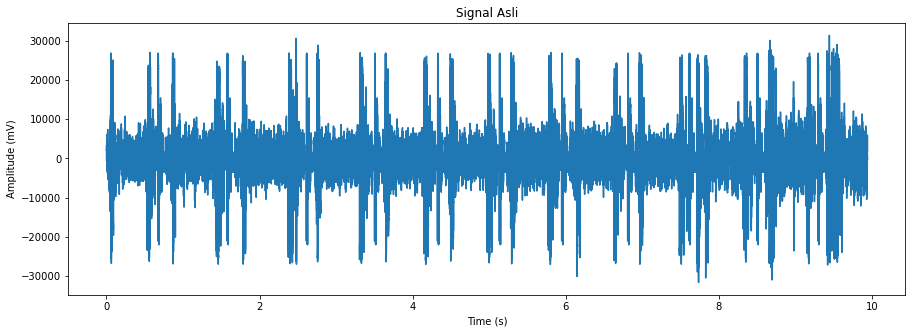

THRESHOLD S1


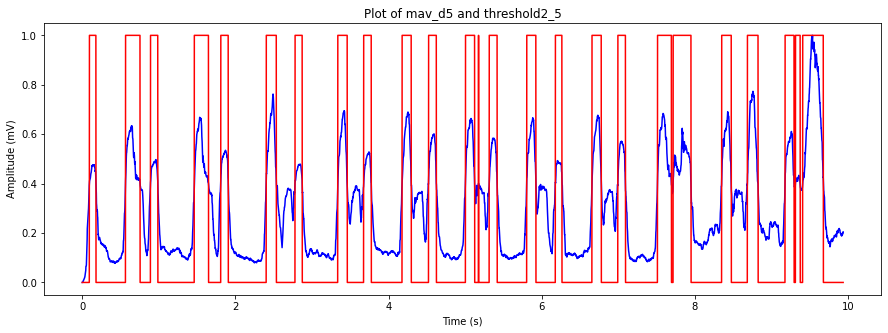

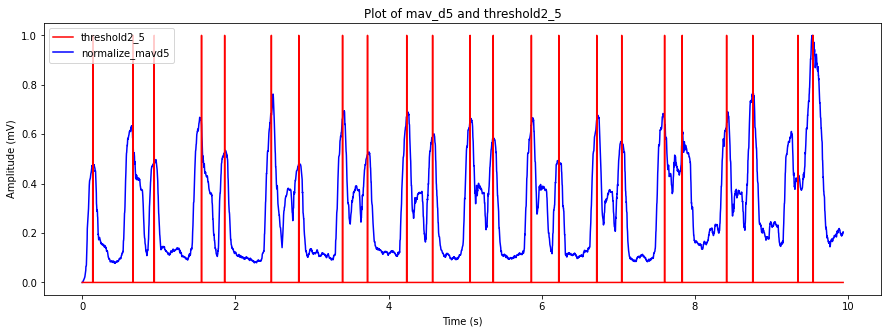

THRESHOLD S2


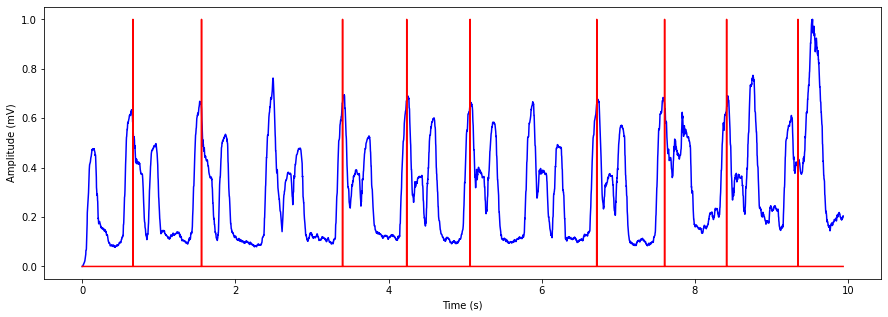

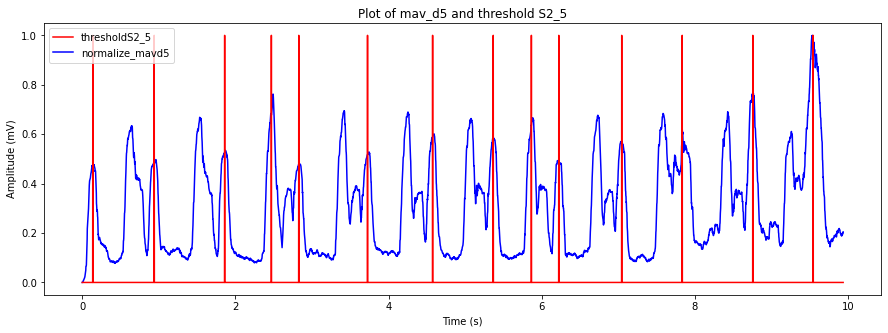

In [110]:
# Plot the signal
plt.figure(figsize=(15, 5))
#plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold2, res, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')

##################################################################3

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdAll, resAll, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

######################################################


######################################################


print("THRESHOLD S1")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS1, cobaS1, color='red', label='thresholdS1_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')



##########################################

print("THRESHOLD S2")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS2, cobaS2, color='red', label='thresholdS2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold S2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()

In [407]:
def dft(s1, fs1):
    ndata = len(s1)
    sreal = [0] * ndata
    simaj = [0] * ndata

    for k in range(ndata):
        for n in range(ndata):
            sreal[k] += s1[n] * math.cos((2 * math.pi * k * n) / ndata)
            simaj[k] -= s1[n] * math.sin((2 * math.pi * k * n) / ndata)

    mag = [0] * ndata
    for k in range(ndata):
        mag[k] = math.sqrt(sreal[k] ** 2 + simaj[k] ** 2)

    # Plotting the magnitude spectrum using bar chart
    x = [(k * fs1) / ndata for k in range(ndata // 2)]
    plt.bar(x, mag[:ndata // 2])
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.show()

    # Compute the Mean Power Frequency (MPF)
    total_power = np.sum(mag[:ndata // 2])
    sum_product = np.sum(np.array(x) * np.array(mag[:ndata // 2]))
    mpf = sum_product / total_power

    max_magnitude = max(mag[:ndata // 2])
    max_magnitude_index = mag[:ndata // 2].index(max_magnitude)
    mpf2 = x[max_magnitude_index]

    print("DFT")
    print("MPF 1:", mpf)
    print("MPF 2:", mpf2)

    for k in range(ndata // 2):
        print("frekuensi : ", x[k], "magnitude:", mag[k])


In [408]:
import math
import matplotlib.pyplot as plt
import numpy as np

def dft2(s1, fs1):
    ndata = len(s1)
    sreal = [0] * ndata
    simaj = [0] * ndata

    for k in range(ndata):
        for n in range(ndata):
            sreal[k] += s1[n] * math.cos((2 * math.pi * k * n) / ndata)
            simaj[k] -= s1[n] * math.sin((2 * math.pi * k * n) / ndata)

    mag = []
    x = []
    for k in range(1, ndata // 2):
        x.append((k * fs1) / ndata)
        mag.append(math.sqrt(sreal[k] ** 2 + simaj[k] ** 2))

    # Plotting the magnitude spectrum using bar chart
    plt.bar(x, mag)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.show()

    # Compute the Mean Power Frequency (MPF)
    total_power = np.sum(mag)
    sum_product = np.sum(np.array(x) * np.array(mag))
    mpf = sum_product / total_power

    max_magnitude = max(mag)
    max_magnitude_index = mag.index(max_magnitude)
    mpf2 = x[max_magnitude_index]

    print("DFT")
    print("MPF 1:", mpf)
    print("MPF 2:", mpf2)

    for k in range(len(x)):
        print("frekuensi:", x[k], "magnitude:", mag[k])


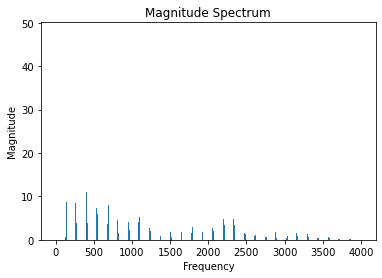

DFT
MPF 1: 1111.7151260538808
MPF 2: 40.63205417607224
frekuensi: 4.514672686230249 magnitude: 10.248255892637436
frekuensi: 9.029345372460497 magnitude: 4.460804983148326
frekuensi: 13.544018058690744 magnitude: 3.8564321740175926
frekuensi: 18.058690744920995 magnitude: 8.293234356134217
frekuensi: 22.573363431151243 magnitude: 5.0543120761205165
frekuensi: 27.08803611738149 magnitude: 1.973924983775818
frekuensi: 31.602708803611737 magnitude: 11.69045181613511
frekuensi: 36.11738148984199 magnitude: 20.492563834882493
frekuensi: 40.63205417607224 magnitude: 47.70538805909827
frekuensi: 45.146726862302486 magnitude: 23.025509210127932
frekuensi: 49.66139954853273 magnitude: 18.07471998610479
frekuensi: 54.17607223476298 magnitude: 10.005888893555944
frekuensi: 58.690744920993225 magnitude: 4.068679504713208
frekuensi: 63.205417607223474 magnitude: 4.919946539045757
frekuensi: 67.72009029345372 magnitude: 5.818340278410226
frekuensi: 72.23476297968398 magnitude: 9.921963545071275
frek

frekuensi: 3399.548532731377 magnitude: 0.41463067422990685
frekuensi: 3404.063205417607 magnitude: 0.9758049639663311
frekuensi: 3408.5778781038375 magnitude: 0.36848907929519786
frekuensi: 3413.092550790068 magnitude: 0.7737616669409244
frekuensi: 3417.607223476298 magnitude: 0.5069998378618675
frekuensi: 3422.121896162528 magnitude: 0.5771652073994782
frekuensi: 3426.6365688487585 magnitude: 0.24845345934013774
frekuensi: 3431.151241534989 magnitude: 0.4492183754863161
frekuensi: 3435.665914221219 magnitude: 0.6240017541236766
frekuensi: 3440.180586907449 magnitude: 0.22078248430090486
frekuensi: 3444.6952595936796 magnitude: 0.33392083203421186
frekuensi: 3449.2099322799095 magnitude: 1.282923646587501
frekuensi: 3453.72460496614 magnitude: 0.5668274450284191
frekuensi: 3458.23927765237 magnitude: 0.31633992305804215
frekuensi: 3462.7539503386006 magnitude: 0.6301837727526792
frekuensi: 3467.2686230248305 magnitude: 0.3627753480244665
frekuensi: 3471.783295711061 magnitude: 0.54958

In [409]:
coba_dft2 =  dft2(normalize_mavd5, 8000)

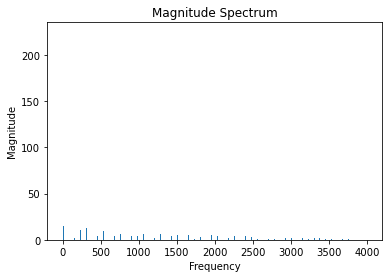

DFT
MPF 1: 1113.3967748528084
MPF 2: 0.0
frekuensi :  0.0 magnitude: 223.876305299046
frekuensi :  6.033182503770739 magnitude: 23.58956260156687
frekuensi :  12.066365007541478 magnitude: 15.221810208909448
frekuensi :  18.099547511312217 magnitude: 16.382273944873276
frekuensi :  24.132730015082956 magnitude: 14.740110278698161
frekuensi :  30.165912518853695 magnitude: 16.565590665641402
frekuensi :  36.199095022624434 magnitude: 9.986002352551358
frekuensi :  42.23227752639517 magnitude: 75.90726683348537
frekuensi :  48.26546003016591 magnitude: 4.043893754721667
frekuensi :  54.29864253393665 magnitude: 8.769041221395273
frekuensi :  60.33182503770739 magnitude: 4.048636955271063
frekuensi :  66.36500754147814 magnitude: 6.115859981751523
frekuensi :  72.39819004524887 magnitude: 13.07143339718565
frekuensi :  78.43137254901961 magnitude: 6.081424819566849
frekuensi :  84.46455505279035 magnitude: 16.990211704217394
frekuensi :  90.49773755656109 magnitude: 5.492401982169518
frek

In [147]:
coba_dft =  dft(normalize_mavd5, 8000)

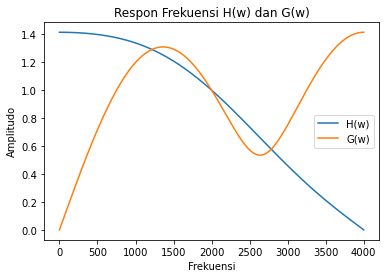

In [60]:
def respon_frekuensi_hg(fs, g, h):
    Hw = np.zeros(800000)
    Gw = np.zeros(800000)

    for i in range(fs+1):
        reH = 0
        imH = 0
        reG = 0
        imG = 0

        for k in range(-1, 3):
            reG += g[k] * np.cos(k * 2 * np.pi * i / fs)
            imG -= g[k] * np.sin(k * 2 * np.pi * i / fs)
            reH += h[k] * np.cos(k * 2 * np.pi * i / fs)
            imH -= h[k] * np.sin(k * 2 * np.pi * i / fs)

        Hw[i] = np.sqrt(reH**2 + imH**2)
        Gw[i] = np.sqrt(reG**2 + imG**2)

    plt.plot(range(int(fs/2)+1), Hw[:int(fs/2)+1])
    plt.plot(range(int(fs/2)+1), Gw[:int(fs/2)+1])
    plt.xlabel('Frekuensi')
    plt.ylabel('Amplitudo')
    plt.title('Respon Frekuensi H(w) dan G(w)')
    plt.legend(['H(w)', 'G(w)'])
    plt.show()
    
    return Hw, Gw

fs = 8000  # Jumlah sampel

Hw,Gw=respon_frekuensi_hg(fs, g, h)

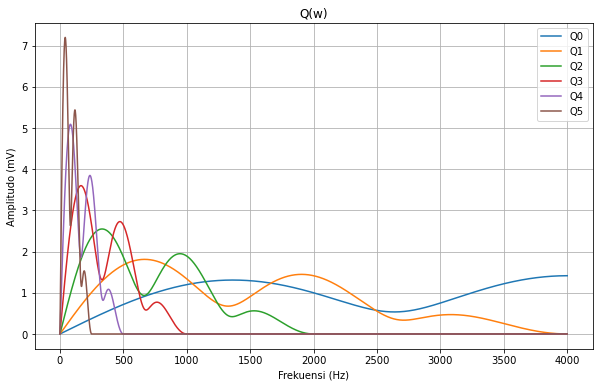

Q0 = 0 - 4000.0
Q1 = 0 - 4000.0
Q2 = 0 - 2000.0
Q3 = 0 - 1000.0
Q4 = 0 - 500.0
Q5 = 0 - 250.0


In [61]:
import numpy as np
import matplotlib.pyplot as plt

def Qj_w(fs, Gw, Hw):
    Q = np.zeros((9, 80000))

    for i in range(1, round(fs/2)+1):
        Q[1, i] = Gw[i]
        Q[2, i] = Gw[2*i] * Hw[i]
        Q[3, i] = Gw[4*i] * Hw[2*i] * Hw[i]
        Q[4, i] = Gw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]
        Q[5, i] = Gw[16*i] * Hw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]
        Q[6, i] = Gw[32*i] * Hw[16*i] * Hw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]

    plt.figure(figsize=(10, 6))
    plt.plot(range(int(fs/2)+1), Q[1, :int(fs/2)+1], label='Q0')
    plt.plot(range(int(fs/2)+1), Q[2, :int(fs/2)+1], label='Q1')
    plt.plot(range(int(fs/2)+1), Q[3, :int(fs/2)+1], label='Q2')
    plt.plot(range(int(fs/2)+1), Q[4, :int(fs/2)+1], label='Q3')
    plt.plot(range(int(fs/2)+1), Q[5, :int(fs/2)+1], label='Q4')
    plt.plot(range(int(fs/2)+1), Q[6, :int(fs/2)+1], label='Q5')

    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Amplitudo (mV)')
    plt.title('Q(w)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("Q0 = 0 -", fs/2**1)

    for i in range(1, 6):
        print("Q{} = 0 - {}".format(i, fs/2**i))

# Contoh penggunaan
fs = 8000
# Jumlah sampel

Qj_w(fs, Gw, Hw)


In [62]:
a1_rekonstruksi = rekonstruksi(a1, d1)

In [63]:
print(amplitude_right.shape)
a1_array = np.array(a1_rekonstruksi)
print(a1_array.shape)
#print(Y1_lib.shape)

(64624,)
(64624,)


In [64]:
### import numpy as np

#def calculate_mae(signal1, signal2):
    #mae = np.mean(np.abs(signal1 - signal2))
    #return mae

#mae_a1 = calculate_mae(a1_rekonstruksi, Y1_lib)
#mae_a2 = calculate_mae(a2_rekonstruksi, Y2_lib)
# Hitung MAE untuk sinyal lainnya

#print("MAE for a1:", mae_a1)
#print("MAE for a2:", mae_a2)
# Cetak MAE untuk sinyal lainnya

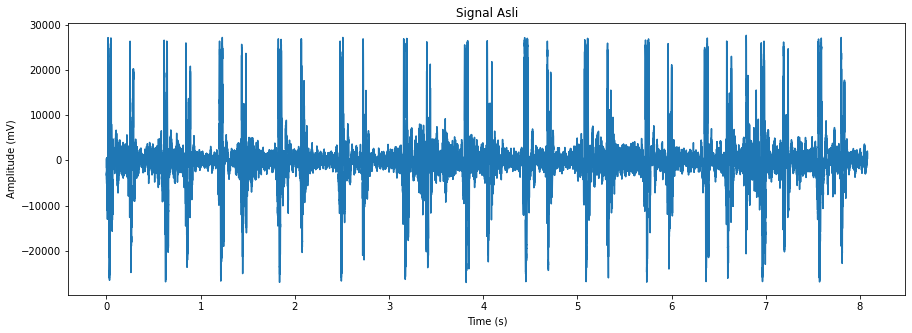

THRESHOLD S1


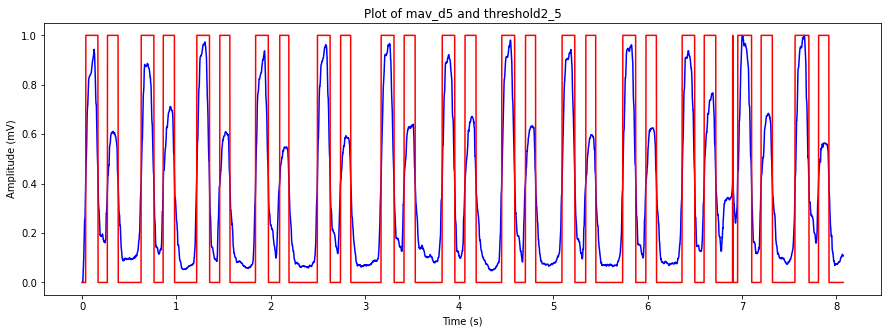

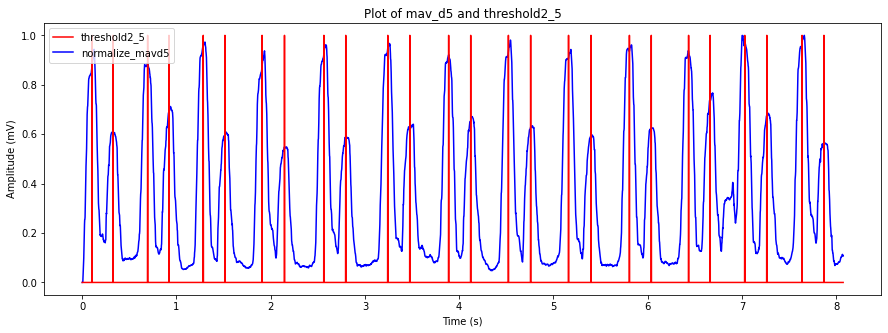

THRESHOLD S2


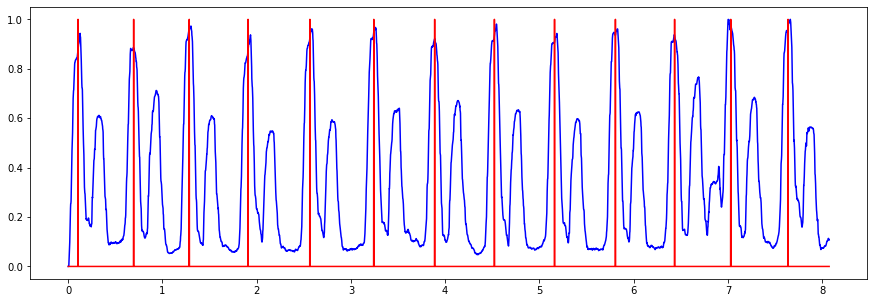

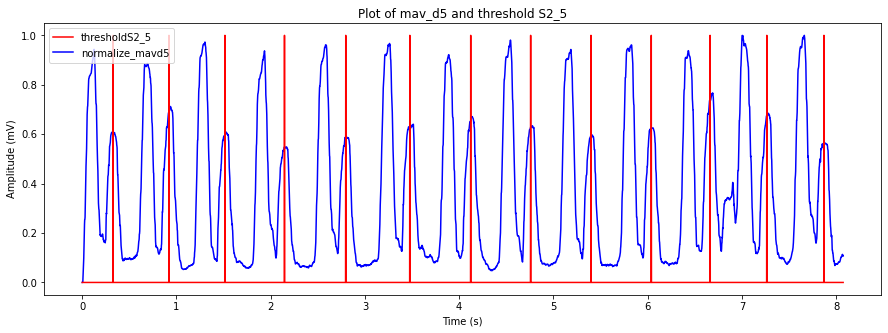

In [65]:
# Plot the signal
plt.figure(figsize=(15, 5))
#plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold2, res, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel("Sample")
plt.ylabel("Amplitude/Threshold")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')

##################################################################3

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdAll, resAll, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

######################################################


######################################################


print("THRESHOLD S1")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS1, cobaS1, color='red', label='thresholdS1_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)



##########################################

print("THRESHOLD S2")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS2, cobaS2, color='red', label='thresholdS2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold S2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()